In [14]:
import pandas as pd
from pandas_datareader import data as pdr
import mplfinance as fplt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
ticker="ETH-USD"
df = yf.download(ticker, start="2000-01-01", end="2023-04-01")
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-09,1534.031616,1544.108398,1423.264771,1438.660767,1438.660767,9457897583
2023-03-10,1438.760132,1438.760132,1378.525391,1429.158081,1429.158081,12665194936
2023-03-11,1429.100830,1484.136963,1428.723145,1482.616699,1482.616699,14917080154
2023-03-12,1482.431885,1607.152588,1461.610962,1590.292969,1590.292969,11480965122
2023-03-13,1590.573486,1626.766357,1588.136230,1603.332275,1603.332275,12826910720


In [24]:
x=df['Adj Close'].iloc[-1]*0.05
print('Brick Size is',x)

Brick Size is 80.16661376953125


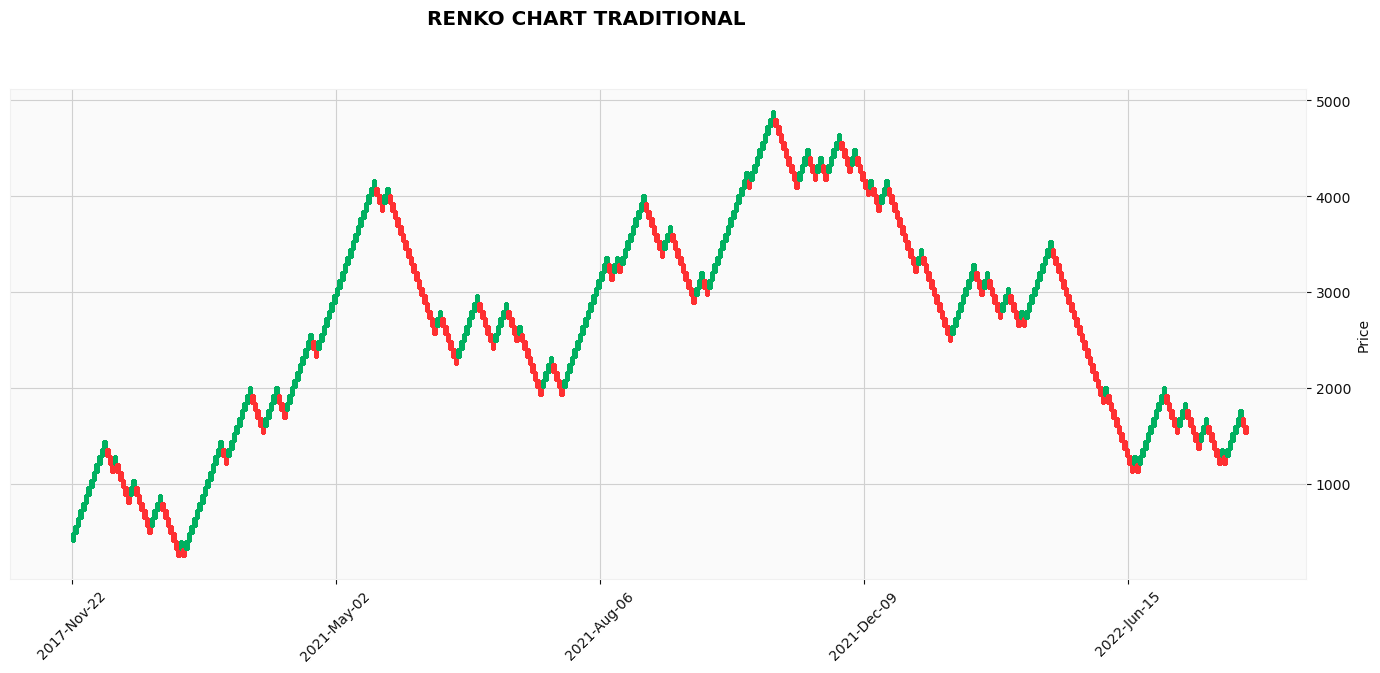

In [25]:
fplt.plot(df,type='renko',renko_params=dict(brick_size=x),style='yahoo',figsize=(18,7), title = "RENKO CHART TRADITIONAL")

In [26]:
df = yf.download(ticker, start="2000-01-01", end="2023-03-01", interval='1wk')

# the simple moving average over a period of 10 weeks
df['SMA_10'] = df['Adj Close'].rolling(10, min_periods=1).mean()

# the simple moving average over a period of 40 weeks
df['SMA_40'] = df['Adj Close'].rolling(40, min_periods=1).mean()

df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_40
Date,,,,,,,,
2023-01-30,1646.147705,1704.458130,1546.660767,1631.645874,1631.645874,55380178545,1389.478979,1487.468619
2023-02-06,1631.645264,1688.527222,1501.462036,1515.033691,1515.033691,52062302111,1412.956689,1462.407962
2023-02-13,1514.916992,1732.801147,1470.023926,1681.436157,1681.436157,63586351348,1454.713452,1450.801196
2023-02-20,1682.337036,1716.489380,1567.631714,1640.817139,1640.817139,54922618696,1500.323645,1440.742371
2023-02-27,1640.763672,1663.433716,1601.548584,1663.433716,1663.433716,21265348858,1544.770813,1437.027438


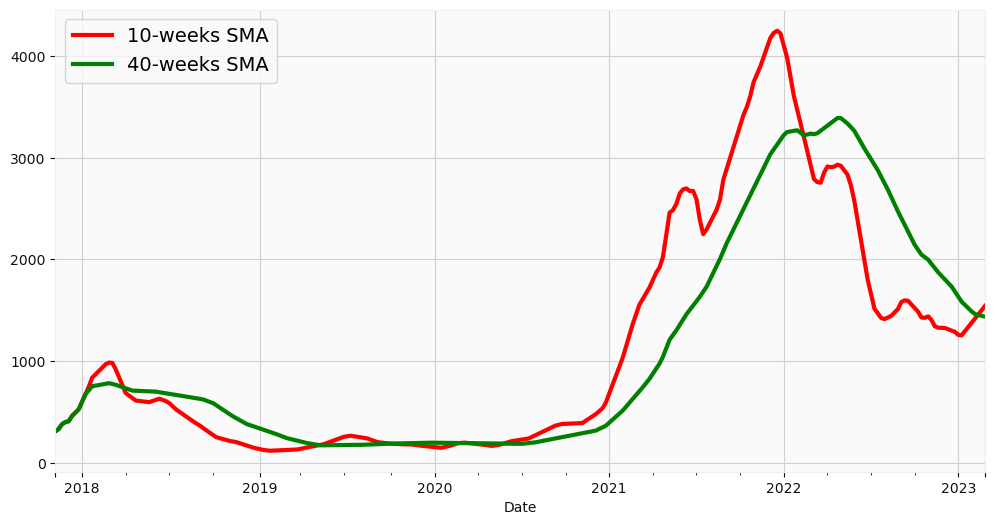

In [27]:
df['SMA_10'].plot(color='red', linewidth=3, figsize=(12,6))
df['SMA_40'].plot(color='green', linewidth=3, figsize=(12,6))
plt.legend(labels =['10-weeks SMA', '40-weeks SMA'], fontsize=14)